![Github_top](https://user-images.githubusercontent.com/33735397/206313977-e67ba652-3340-4a1b-b1d1-141d8d5001f2.PNG)

# Community Streamflow Evaluation System (CSES)

National-scale streamflow modeling remains a modern challenge, as changes in the underlying hydrology from land use and land cover (LULC) change, anthropogentic streamflow modification, and general process components (reach length, hydrogeophysical processes, precipitation, temperature, etc) greatly influence  hydrological modeling.
In a changing climate, there is a need to anticipate flood intensity, impacts of groundwater depletion on streamflow, western montain low-flow events, eastern rain-on-snow events, storm-induced flooding, and other severe environmental problems that challenge the management of water resources.
Given the National Water Model (NWM) bridges the gap between the spatially coarse USGS streamflow observations by providing a near-continuous 2.7 million reach predictions of streamflow, there lies the potential to improve upon the capabilities of the model by characterizing predictive performance across the heterogeneity of proces ses and land covers present at the national scale. 
The python-based Community Streamflow Evaluation System (CSES) package provides a tool to evaluate national hydrogrphy dataset (NHD) based model outputs with colocated USGS/NWIS streamflow monitorng stations (parameter: 060). 
The package contains three key methods for evaluation: State-based LULC analysis, HUC level analysis, and USGS station-based reach analysis.
Below is a description of each method and application.
While designed to us the NWM version 2.1 retrospective dataset, with minimal modification the tool should be able to take in other model formulations.
By using the CSES, researchers can identify locations where a model may benefit from further training/calibration/parameterization or a need for new model processes/features (e.g., integration of reservoir release operaitons) to ultimately create new post-processing methods and/or hydrological modeling formulations to improve streamflow prediction capabilities with respect to modeling needs (e.g., stormflow, supply, emergency management, flooding, etc).   


In [1]:
import ROSET_AWS
import os
import warnings
warnings.filterwarnings("ignore")
#set path directory
cwd = os.getcwd()

# Streamflow Evaluator: State Class

This section of code allows the user to evaluate modeled streamflow with observed in situ NWIS monitoring sites.
Please enter a start date, end date, frequency, state of interest, and model to compare (NWM v2.1 is set up).
Select the below classes to evaluate model performance, set the classification to the provided term

Tell the model what type of classification you are interested in:

* Drainage area breaks: <span style="color:red">"Drainage_area_mi2" </span>
* Elevation breaks: <span style="color:red">"Mean_Basin_Elev_ft"</span>
* Forest area breaks: <span style="color:red">"Perc_Forest"</span>
* Developed area breaks: <span style="color:red">"Perc_Develop"</span>
* Impervious area breaks: <span style="color:red">"Perc_Imperv"</span>
* Herbacious area breaks: <span style="color:red">"Perc_Herbace"</span>
* Slope area > 30 degrees breaks: <span style="color:red">"Perc_Slop_30"</span>
* Precipitation breaks: <span style="color:red">"Mean_Ann_Precip_in"</span>
* low flows: <span style="color:red">"Ann_low_cfs"</span>
* Mean flows: <span style="color:red">"Ann_mean_cfs"</span>
* High flows: <span style="color:red">"Ann_hi_cfs"</span>

![LULC_Eval_top_image](https://user-images.githubusercontent.com/33735397/206321617-354fbbe1-3a61-4be2-8234-daf95fd4d926.PNG)


In [2]:
#Set desired start and end date, state, model for comparision, and LULC class
startDT ='2001-5-24'
endDT ='2019-8-24' #last day of data is 2020-09-28
state = 'ut'
#the model name must match with the folder name in which model predictions are in.
#model = 'NWM'
model = 'NWM_v2.1'
classification = 'Drainage_area_mi2'

#Inititate Streamflow Evaluator
State_Eval = ROSET_AWS.LULC_Eval(model, state, startDT, endDT, cwd)

#get state specific NWIS locations
State_Eval.get_NWIS()
State_Eval.get_NHD_Model_info()
State_Eval.class_eval_state(classification)

## Interactive Streamflow plotting.

Categorical break: 
* <span style="color:red">very small</span>: State_Eval.df_vsmall
* <span style="color:red">small</span>: State_Eval.df_small
* <span style="color:red">medium</span>: State_Eval.df_medium
* <span style="color:red">large</span>: State_Eval.df_large
* <span style="color:red">very large</span>: State_Eval.df_vlarge
    
Get a map of locations with plots of NWM vs. OBS
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [3]:
#Input temporal frequency, DF size, and DF size term -- make site name appear with mouse hover
State_Eval.Map_Plot_Eval('M', State_Eval.df_small, 'small', supply = False)

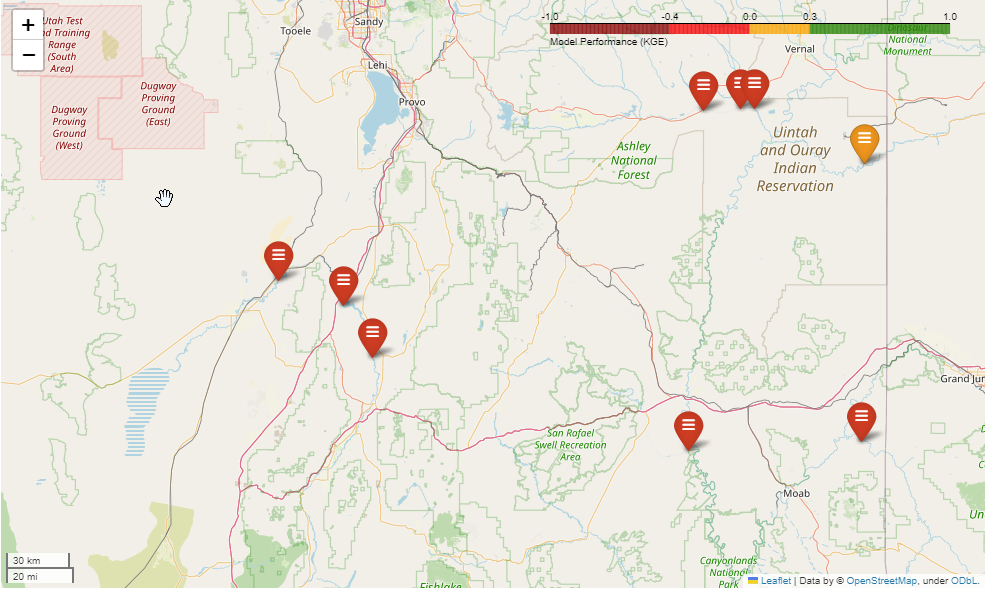

## Interactive Plotting 

Running the dataframe will show all properties and sites
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [4]:
State_Eval.Interactive_Model_Eval('Q', supply = False)

Use State_Eval.Eval.NWIS_site_id if you would like to get the respective NWIS/Modeled site/reaches to plug into the Reach Evaluator class

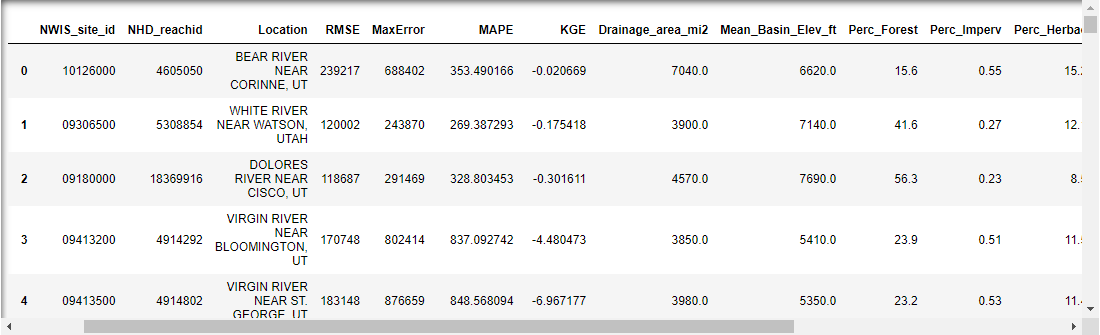

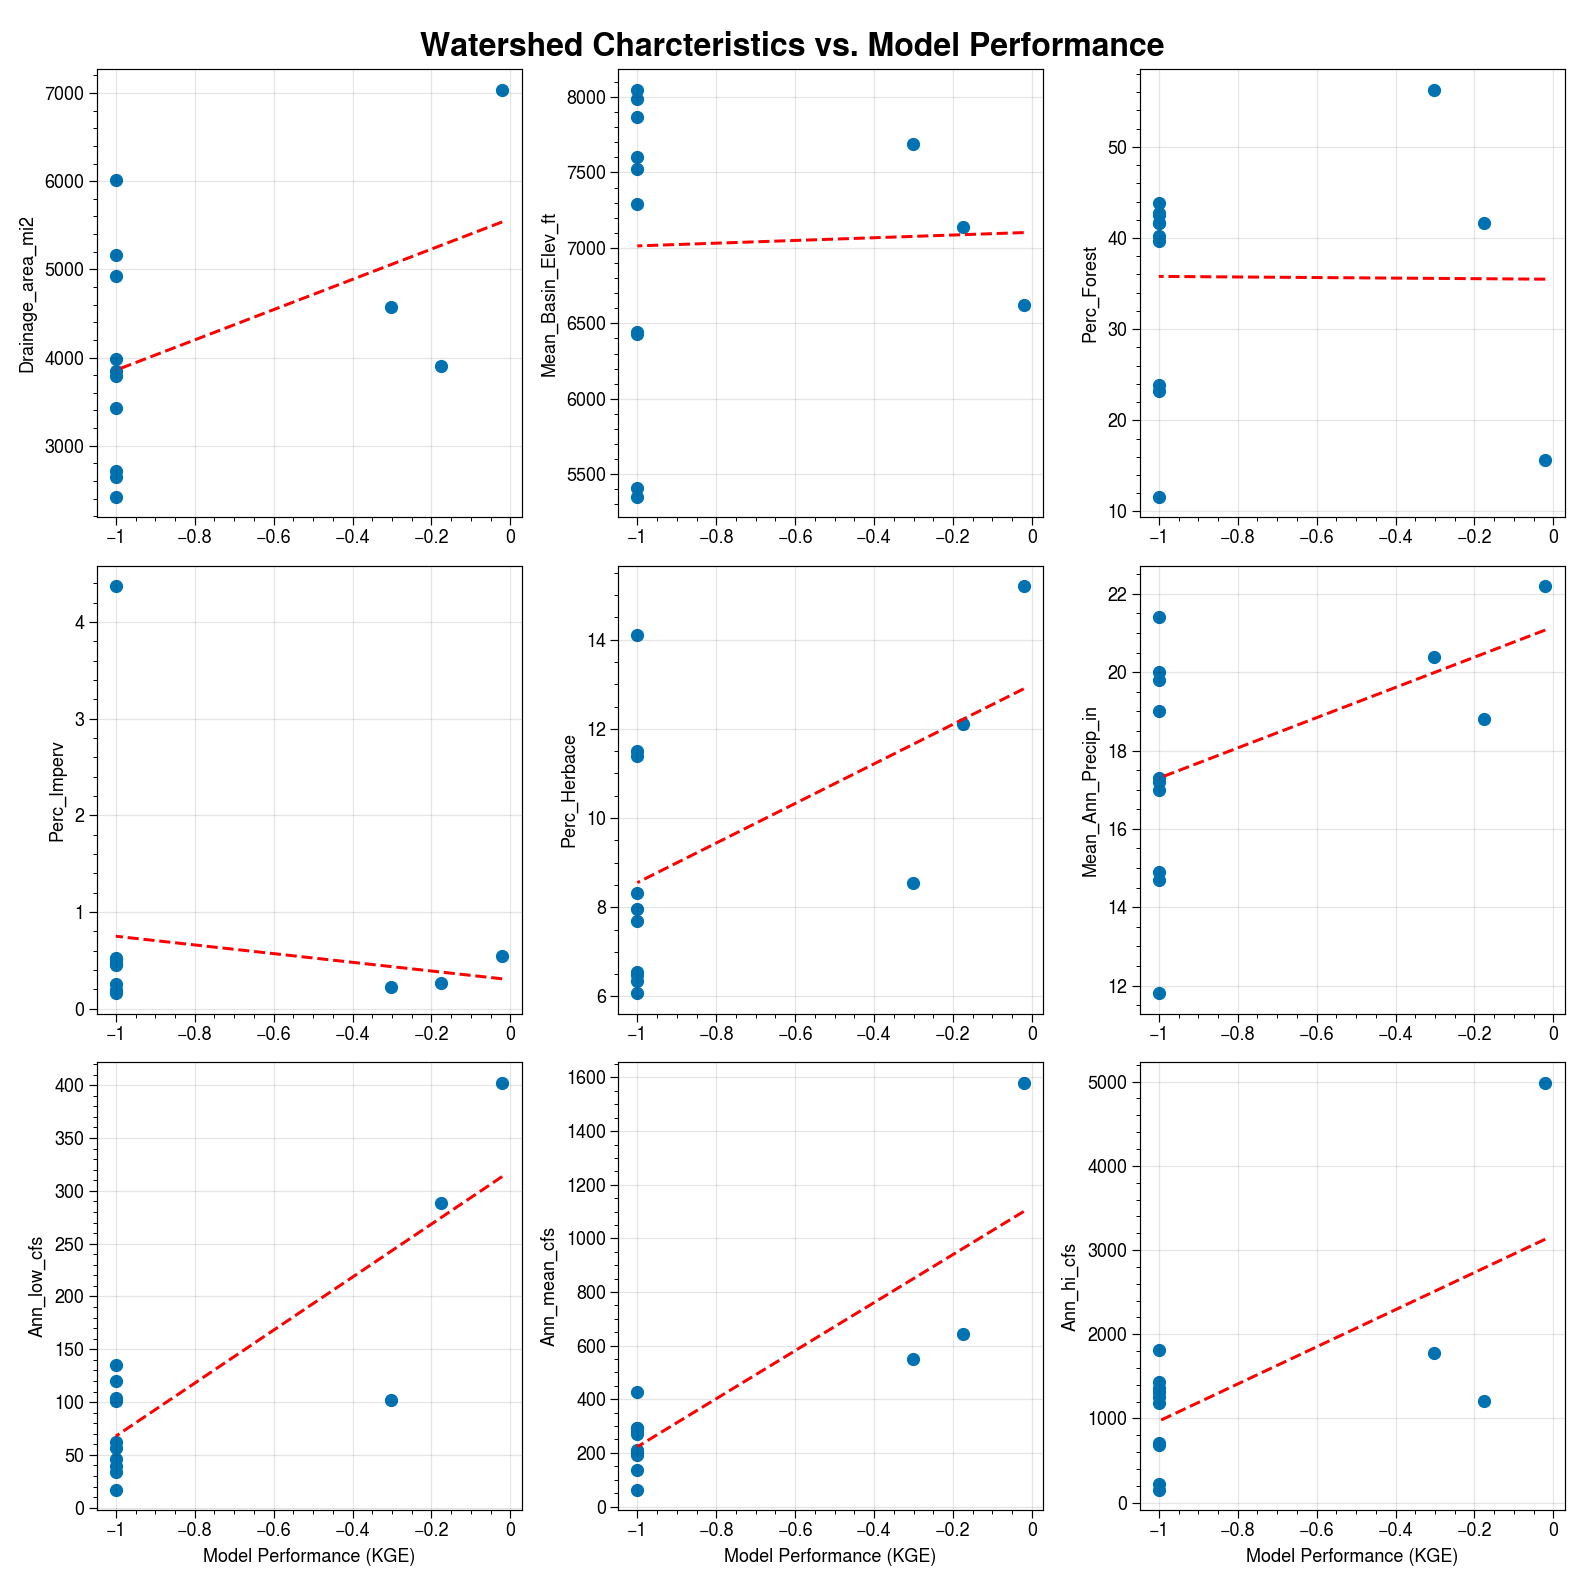

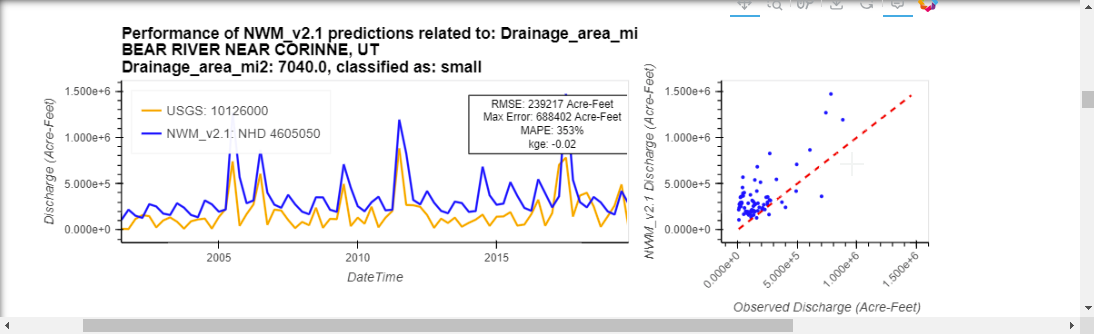